In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

#Collecte de données




In [ ]:
import pandas as pd
import nltk

In [ ]:
path="/content/drive/MyDrive/data/IMDB Dataset.csv"
data=pd.read_csv(path)

In [ ]:
data.head()

,review,sentiment,Cleanedreview
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


In [ ]:
# Afficher le nombre de lignes du DataFrame
nombre_de_lignes = data.shape[0]
print("Nombre de lignes du DataFrame :", nombre_de_lignes)


Nombre de lignes du DataFrame : 50000


In [ ]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
import pandas as pd

# Supprimer les dernières n lignes
n =40000  # Nombre de dernières lignes à supprimer
data.drop(data.tail(n).index, inplace=True)

In [ ]:
# Afficher le nombre de lignes du DataFrame
nombre_de_lignes = data.shape[0]
print("Nombre de lignes du DataFrame :", nombre_de_lignes)


Nombre de lignes du DataFrame : 4000


#Prétraitement des données


In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import spacy

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from nltk.tokenize import word_tokenize

# Initialisation du tokenizer, des stop words et du stemmer
tokenizer = nltk.RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Expression régulière pour le nettoyage des reviews
reg = re.compile("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(w+://\S+)")

# Fonction pour le prétraitement du texte avec stemming et nettoyage
def preprocess_text(text):
    # Suppression des mentions, des hashtags, des caractères non alphanumériques et des URLs
    cleaned_text = reg.sub(" ", text)

    # Tokenisation
    tokens = word_tokenize(cleaned_text)

    # Suppression des stop words et stemming
    filtered_tokens = [stemmer.stem(token) for token in tokens
                       if token.lower() not in stop_words and len(token) > 1]

    return filtered_tokens


# Appliquer le prétraitement sur la colonne 'review'
data['Cleanedreview'] = data['review'].apply(lambda x: ' '.join(preprocess_text(x)))


# Supprimer les lignes vides ou contenant uniquement des stopwords
data = data[data['Cleanedreview'].str.strip() != '']

# Afficher les premières lignes du jeu de données avec les tweets nettoyés
print(data[['review', 'Cleanedreview']].head())
print(data)


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                       Cleanedreview  
0  one review mention watch oz episod hook right ...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic famili littl boy jake think zombi closet...  
4  petter mattei love time money visual stun film...  
                                                 review sentiment  \
0     One of the other reviewers has mentioned that ...  positive   
1     A wonderful little production. <br /><br />The...  positive   
2     I thought this was a wonderful way to spend ti...  positive   
3     Basically there's a family where a little boy ...  

#Présentation des données avec TFIDF


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# Définir le vectoriseur TF-IDF avec les paramètres appropriés
vectorizer = TfidfVectorizer(stop_words=None)

# Transformer les données textuelles en vecteurs TF-IDF
X_tfidf = vectorizer.fit_transform(data["Cleanedreview"])

# Convertir la matrice TF-IDF en une matrice creuse CSR
tfidf_csr = csr_matrix(X_tfidf)

# Créer un DataFrame à partir de la matrice creuse
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_csr,
                                             columns=vectorizer.get_feature_names_out())

# Afficher les premières lignes du DataFrame
print(tfidf_df.head())


    00  000  00001  0069  007  00am   01  0126  01pm   02  ...  zuniga  \
0  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  ...     0.0   
1  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  ...     0.0   
2  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  ...     0.0   
3  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  ...     0.0   
4  0.0  0.0    0.0   0.0  0.0   0.0  0.0   0.0   0.0  0.0  ...     0.0   

   zurich  zurn  zwart  zwick   zz  zzzz  zzzzip  zzzzzzzzzzzz  \
0     0.0   0.0    0.0    0.0  0.0   0.0     0.0           0.0   
1     0.0   0.0    0.0    0.0  0.0   0.0     0.0           0.0   
2     0.0   0.0    0.0    0.0  0.0   0.0     0.0           0.0   
3     0.0   0.0    0.0    0.0  0.0   0.0     0.0           0.0   
4     0.0   0.0    0.0    0.0  0.0   0.0     0.0           0.0   

   zzzzzzzzzzzzzzzzzz  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 356

#Modéle Nu-Support Vector Classification(20% test + 80%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X = tfidf_df.values  # Les vecteurs TF-IDF
y = data['sentiment']  # Les étiquettes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle NuSVC
model = NuSVC(probability=True)
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


#Matrice de confusion

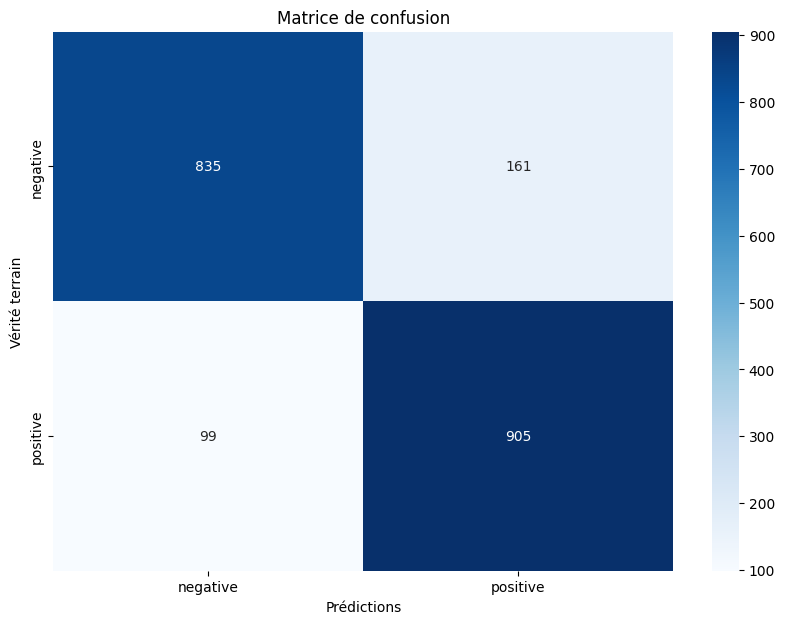

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

model = SVC(probability=True)
# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Nu-Support Vector Classification(10% test + 90%entrai)

In [ ]:

# Diviser les données en ensembles d'entraînement et de test
X = tfidf_df.values  # Les vecteurs TF-IDF
y = data['sentiment']  # Les étiquettes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entraîner le modèle NuSVC
model = NuSVC()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.856
Precision: 0.8586801886183064
Recall: 0.856
F1-score: 0.8556696346922077


#Matrice de confusion

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Nu-Support Vector Classification(30% test + 70%entrai)

In [ ]:

# Diviser les données en ensembles d'entraînement et de test
X = tfidf_df.values  # Les vecteurs TF-IDF
y = data['sentiment']  # Les étiquettes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle NuSVC
model = NuSVC()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.871
Precision: 0.8722782827901465
Recall: 0.871
F1-score: 0.8708340522698957


#Matrice de confusion

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Nu-Support Vector Classification(40% test + 60%entrai)

In [ ]:
# Diviser les données en ensembles d'entraînement et de test
X = tfidf_df.values  # Les vecteurs TF-IDF
y = data['sentiment']  # Les étiquettes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entraîner le modèle NuSVC
model = NuSVC()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8655
Precision: 0.8667018175639712
Recall: 0.8655
F1-score: 0.8654208791076864


#Matrice de confusion

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Multinomial Naive Bayes(20% test + 80%entrai)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import pandas as pd

# Charger les stopwords en anglais
stop_words = list(set(stopwords.words('english')))  # Convertir en liste

# Supprimer les lignes vides ou contenant uniquement des stopwords
data = data[data['Cleanedreview'].str.strip() != '']

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transformer les données textuelles en vecteurs TF-IDF
X = vectorizer.fit_transform(data['Cleanedreview'])

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


Accuracy: 0.8555
Précision: 0.8560086193865118
Rappel: 0.8555
Score F1: 0.8554612297235493


#Matrice de confusion

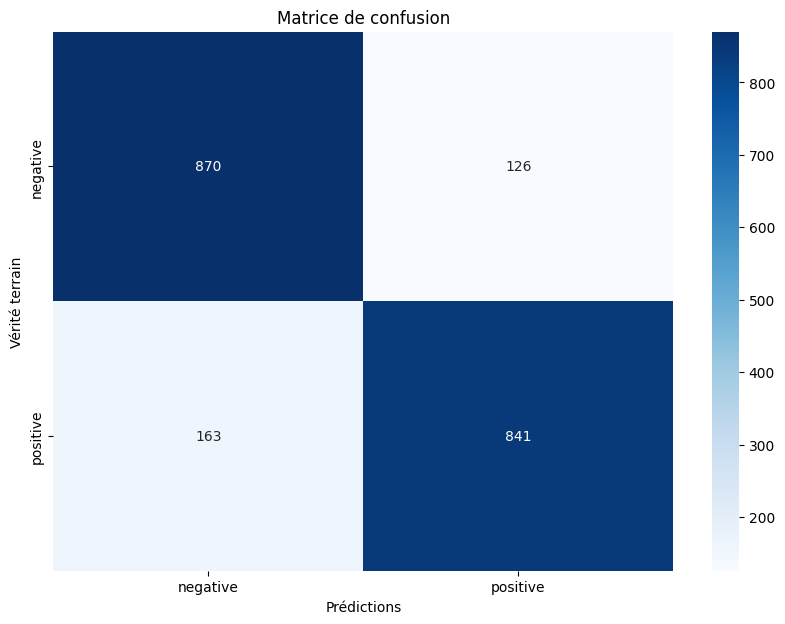

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

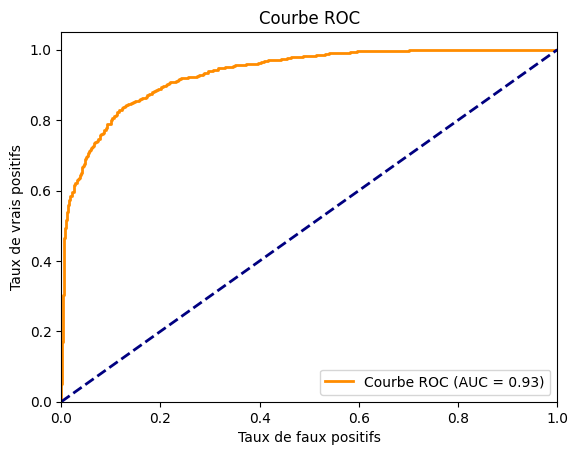

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

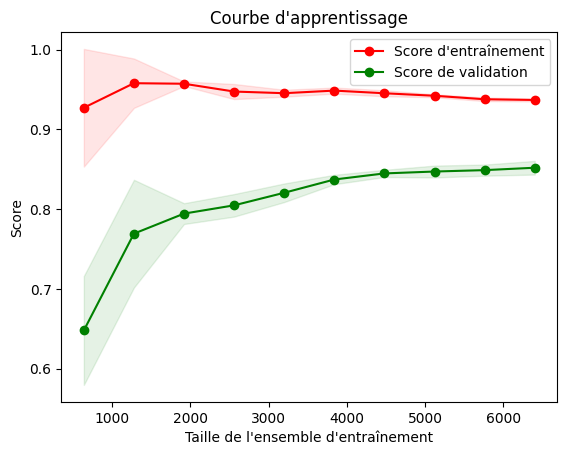

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Multinomial Naive Bayes(10% test + 90%entrai)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import pandas as pd

# Charger les stopwords en anglais
stop_words = list(set(stopwords.words('english')))  # Convertir en liste

# Supprimer les lignes vides ou contenant uniquement des stopwords
data = data[data['Cleanedreview'].str.strip() != '']

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transformer les données textuelles en vecteurs TF-IDF
X = vectorizer.fit_transform(data['Cleanedreview'])

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entraîner le modèle MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


Accuracy: 0.846
Précision: 0.8468576923076924
Rappel: 0.846
Score F1: 0.8459408488573075


#Matrice de confusion

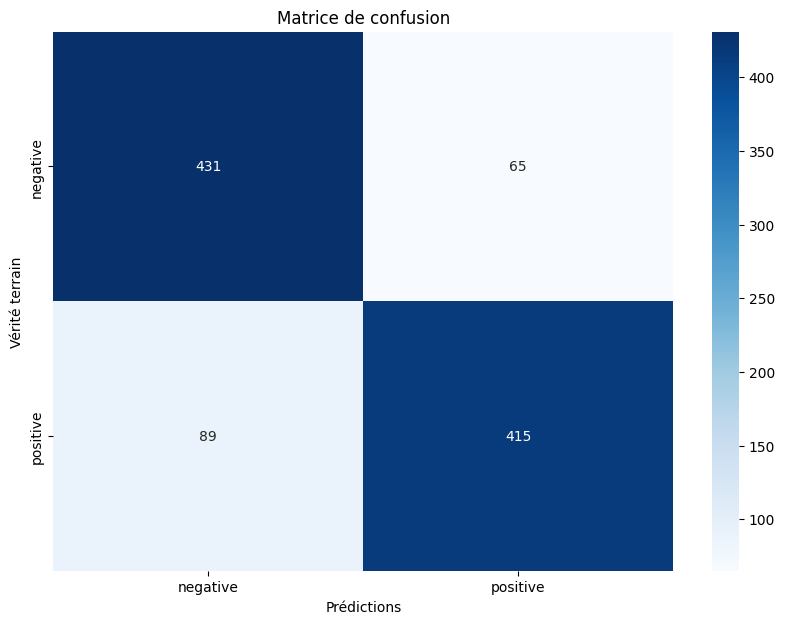

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

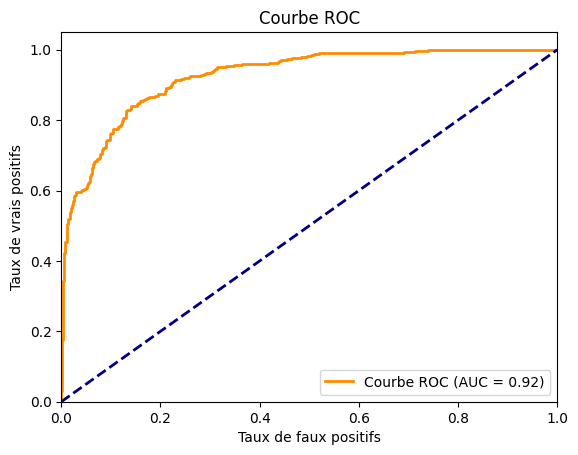

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

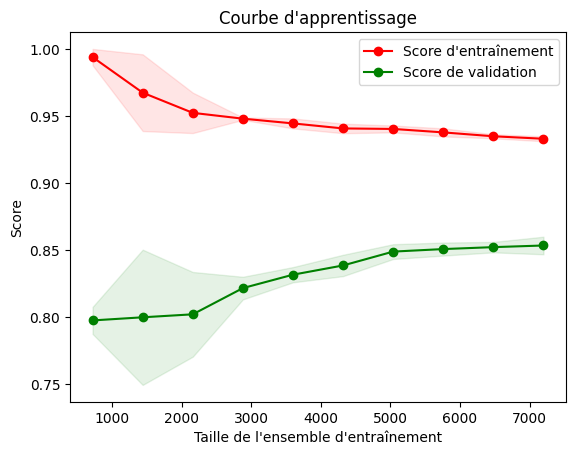

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Multinomial Naive Bayes(30% test + 70%entrai)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import pandas as pd

# Charger les stopwords en anglais
stop_words = list(set(stopwords.words('english')))  # Convertir en liste

# Supprimer les lignes vides ou contenant uniquement des stopwords
data = data[data['Cleanedreview'].str.strip() != '']

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transformer les données textuelles en vecteurs TF-IDF
X = vectorizer.fit_transform(data['Cleanedreview'])

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


Accuracy: 0.8503333333333334
Précision: 0.8514538659528742
Rappel: 0.8503333333333334
Score F1: 0.8502727046918889


#Matrice de confusion

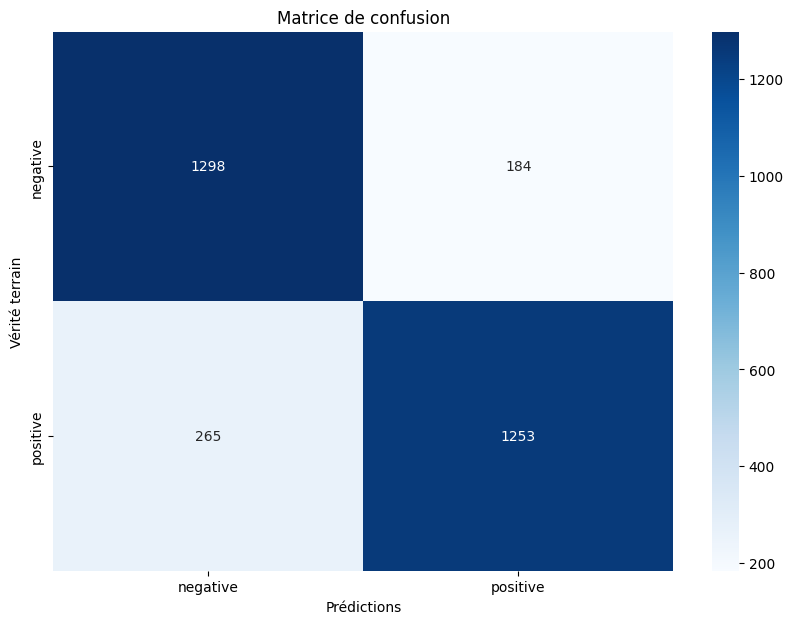

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

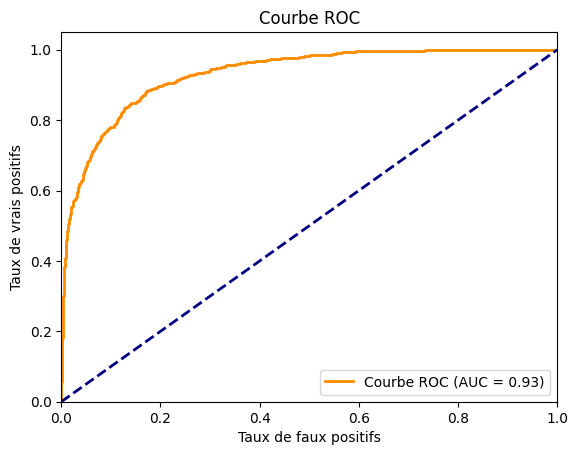

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

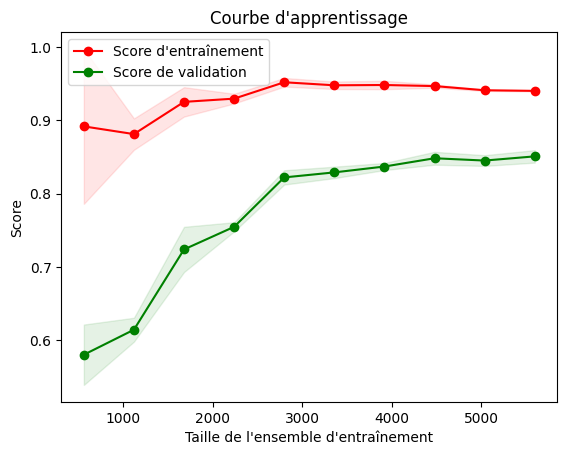

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Multinomial Naive Bayes(40% test + 60%entrai)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
import pandas as pd

# Charger les stopwords en anglais
stop_words = list(set(stopwords.words('english')))  # Convertir en liste

# Supprimer les lignes vides ou contenant uniquement des stopwords
data = data[data['Cleanedreview'].str.strip() != '']

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(stop_words=stop_words)

# Transformer les données textuelles en vecteurs TF-IDF
X = vectorizer.fit_transform(data['Cleanedreview'])

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entraîner le modèle MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


Accuracy: 0.8455
Précision: 0.8455443477390957
Rappel: 0.8455
Score F1: 0.845486440153718


#Matrice de confusion

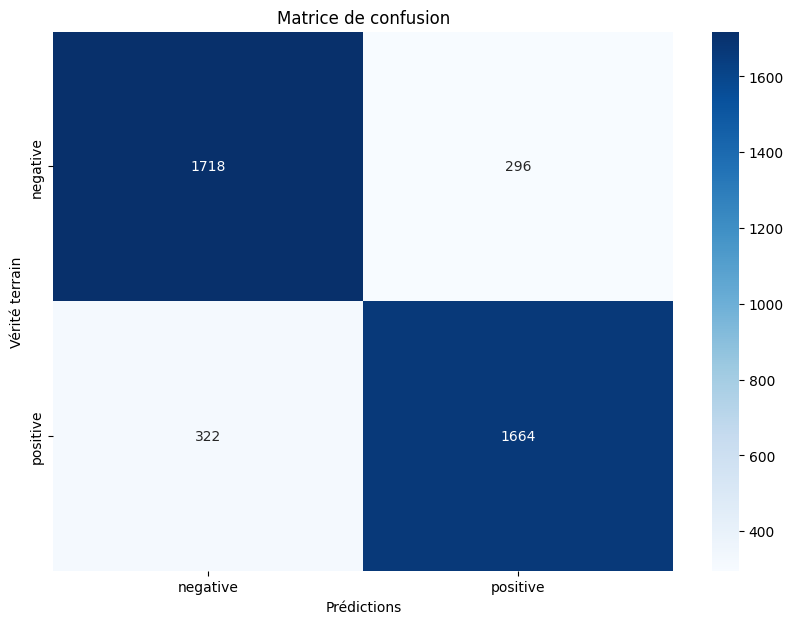

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

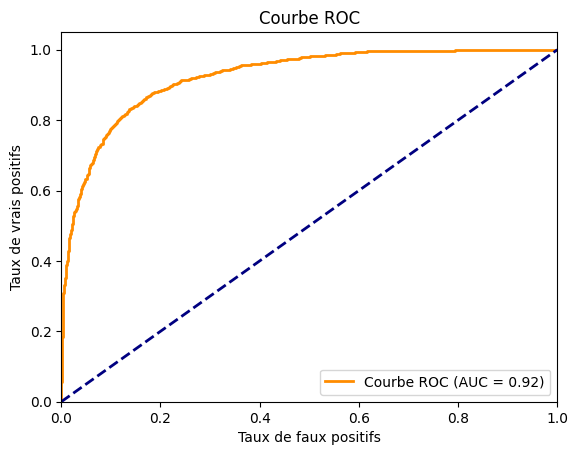

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

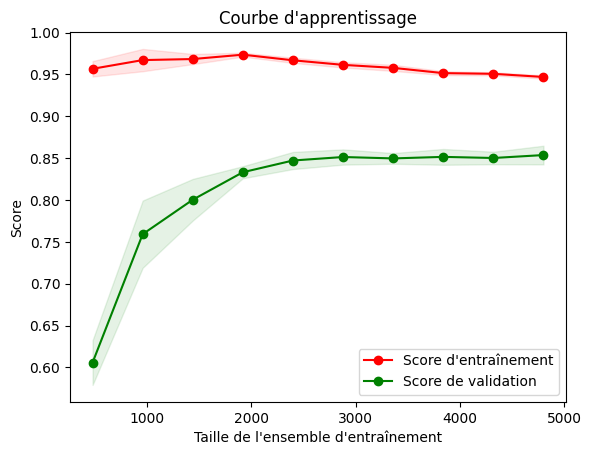

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()


#Modéle Logistic Regression(20% test + 80%entrai)


In [ ]:

from sklearn.linear_model import LogisticRegression

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.863
Précision: 0.8643673521861228
Rappel: 0.863
Score F1: 0.8628511726865411


#Matrice de confusion

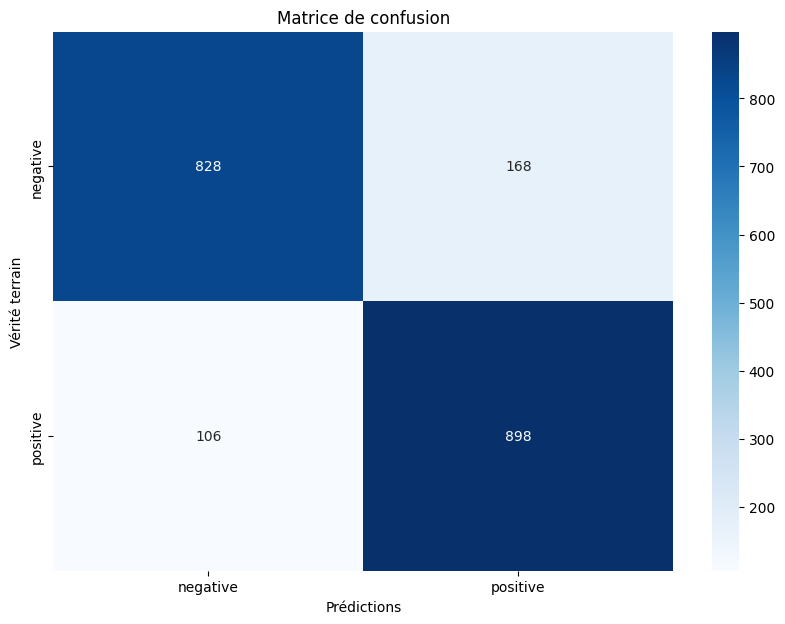

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

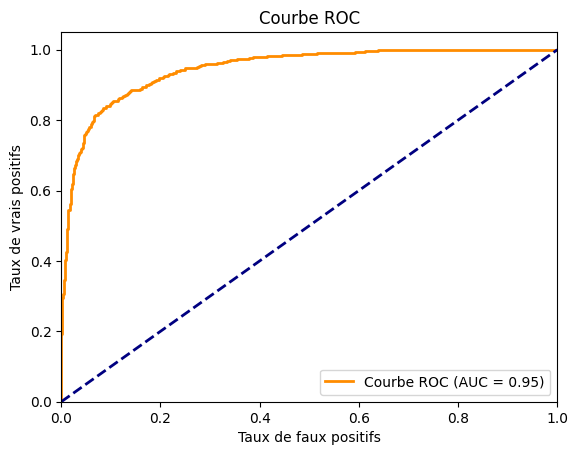

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

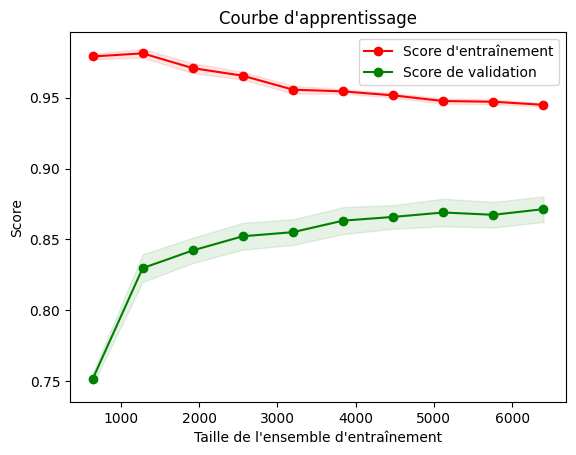

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Logistic Regression(10% test + 90%entrai)

In [ ]:

from sklearn.linear_model import LogisticRegression

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.857
Précision: 0.859098274840722
Rappel: 0.857
Score F1: 0.8567373006972402


#Matrice de confusion

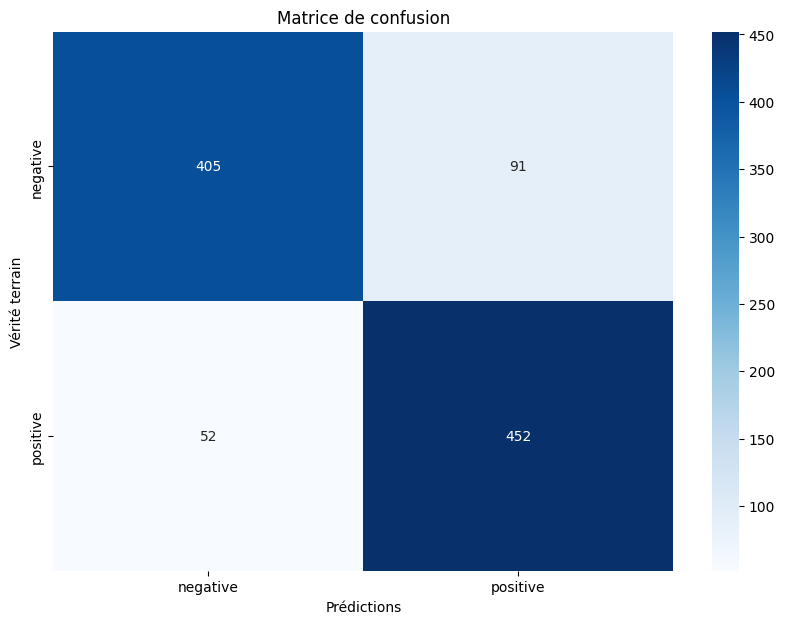

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

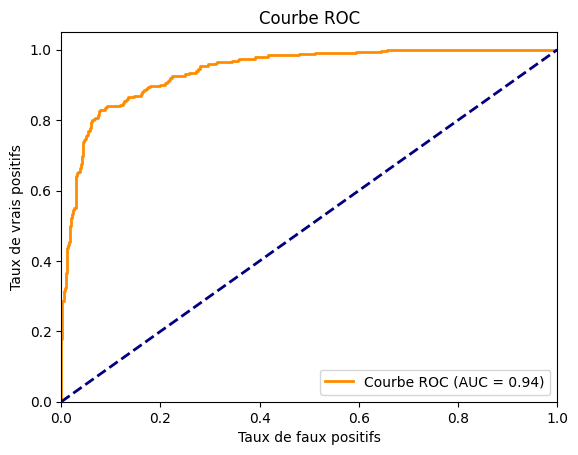

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

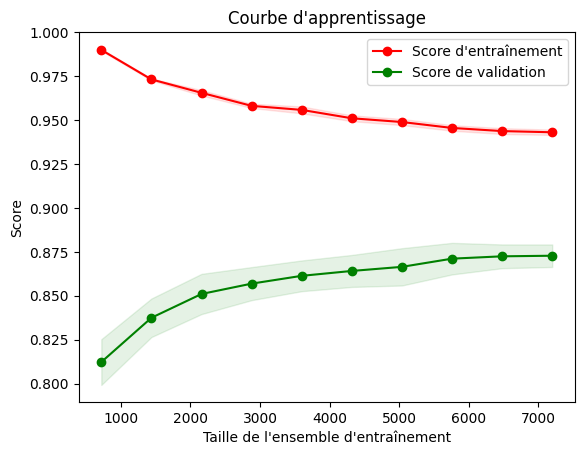

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Logistic Regression(30% test + 70%entrai)

In [ ]:

from sklearn.linear_model import LogisticRegression

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.8663333333333333
Précision: 0.8679610863400464
Rappel: 0.8663333333333333
Score F1: 0.866120241910439


#Matrice de confusion

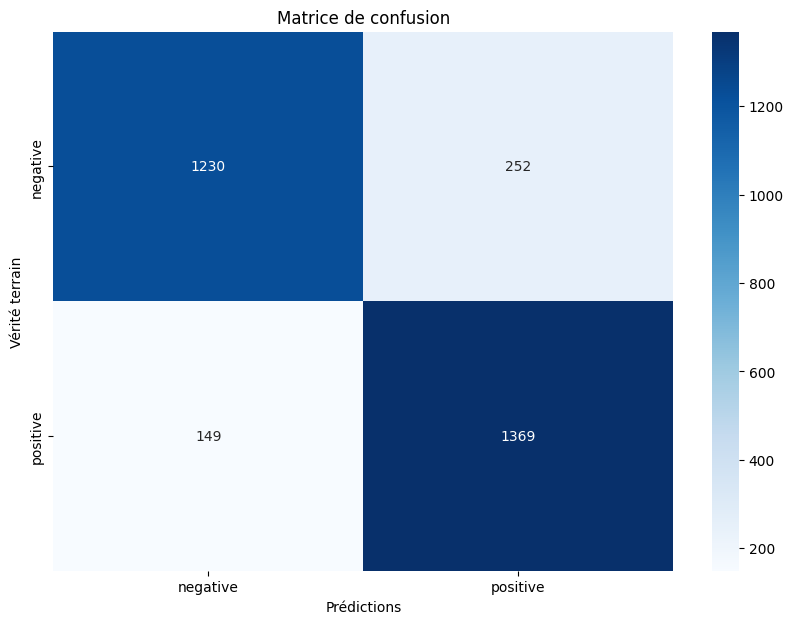

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

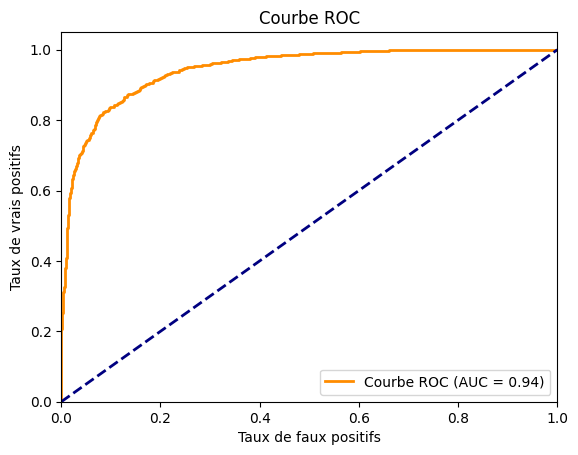

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

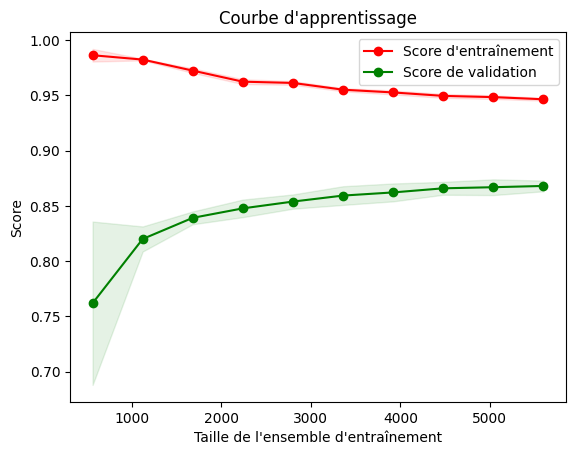

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Logistic Regression(40% test + 60%entrai)

In [ ]:

from sklearn.linear_model import LogisticRegression

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.8635
Précision: 0.8646963163555698
Rappel: 0.8635
Score F1: 0.8634197025888416


#Matrice de confusion

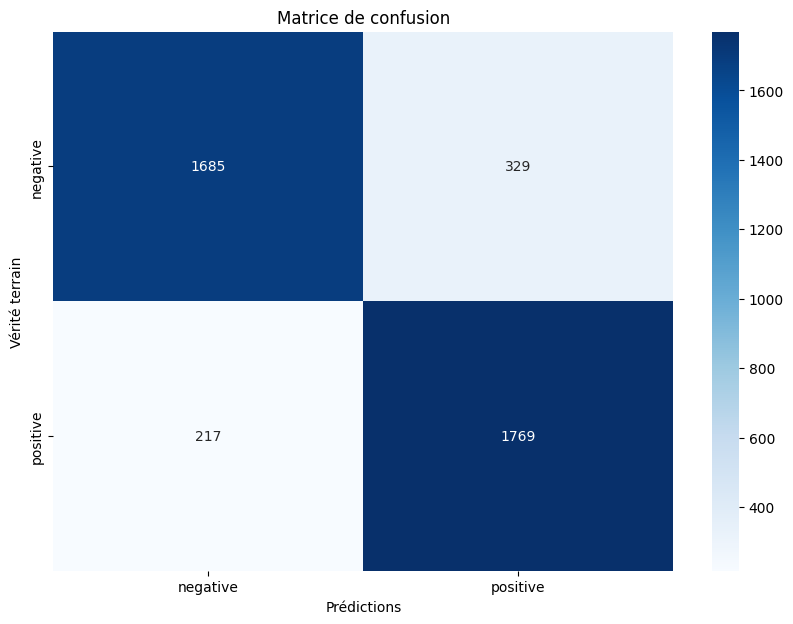

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

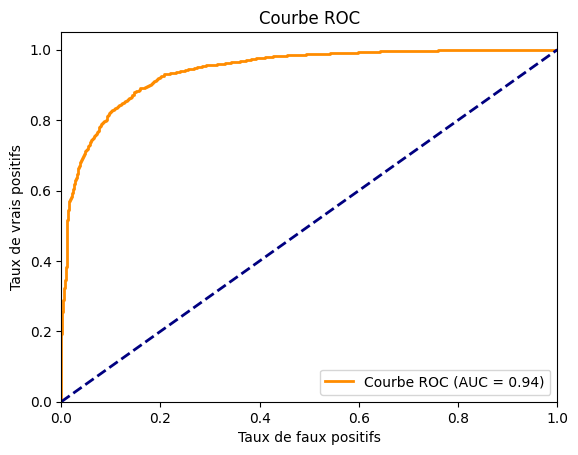

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

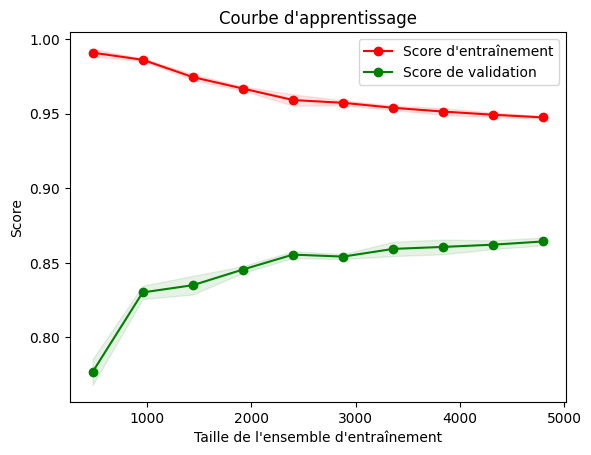

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Complement Naive Bayes(20% test + 80%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.856
Précision: 0.8566531191039861
Rappel: 0.856
Score F1: 0.8559485771387931


#Matrice de confusion

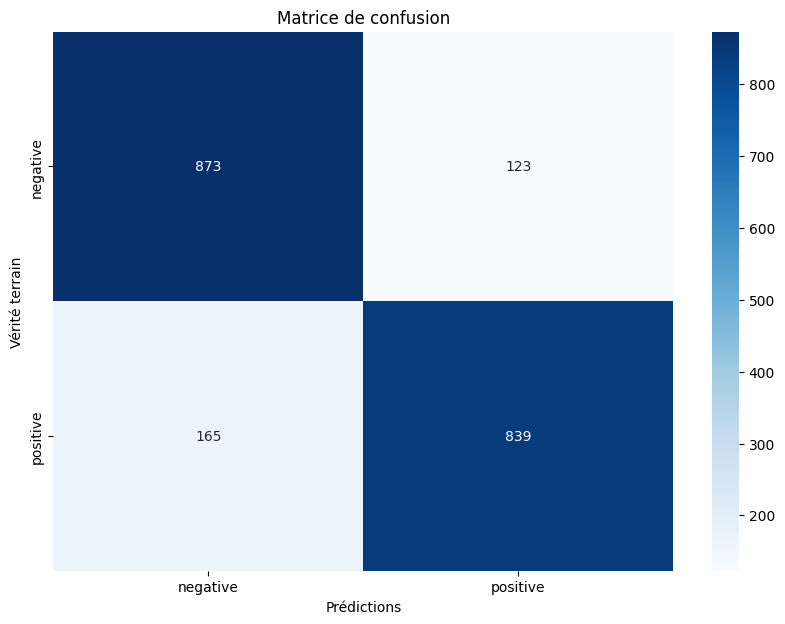

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

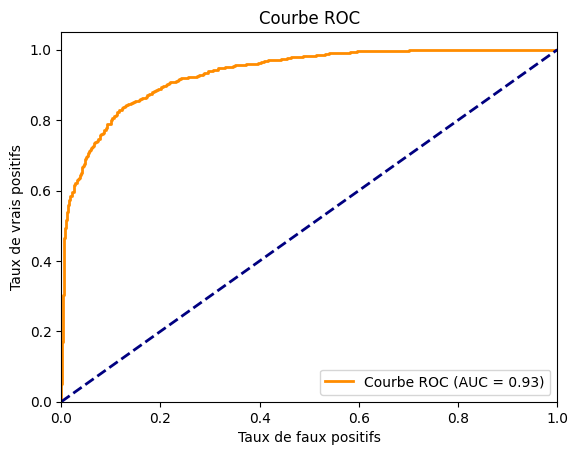

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

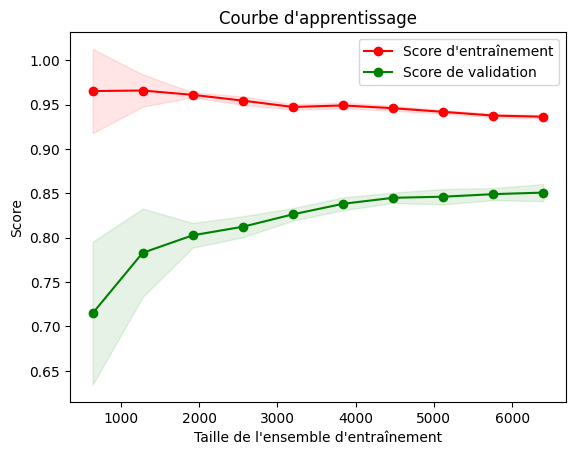

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Complement Naive Bayes(10% test + 90%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entraîner le modèle Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


NameError: name 'X' is not defined

#Matrice de confusion

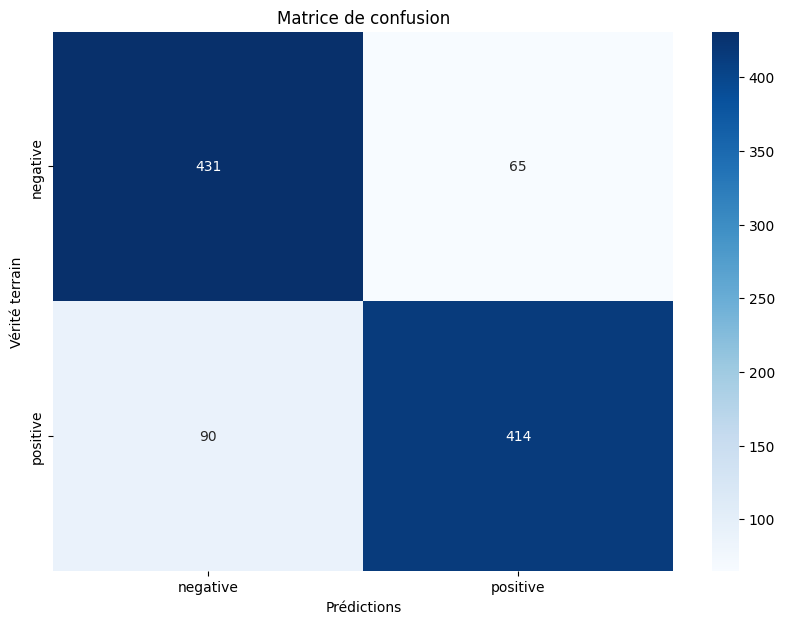

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

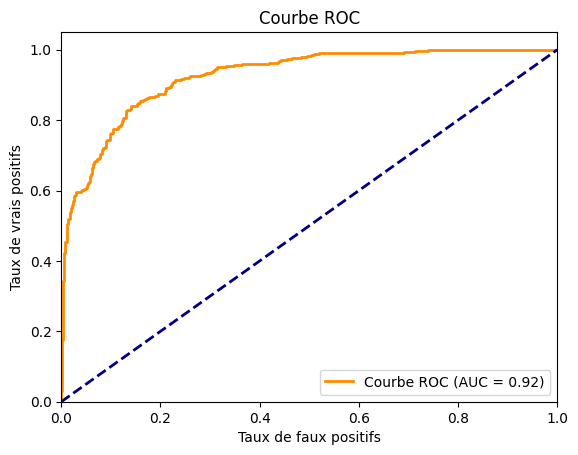

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

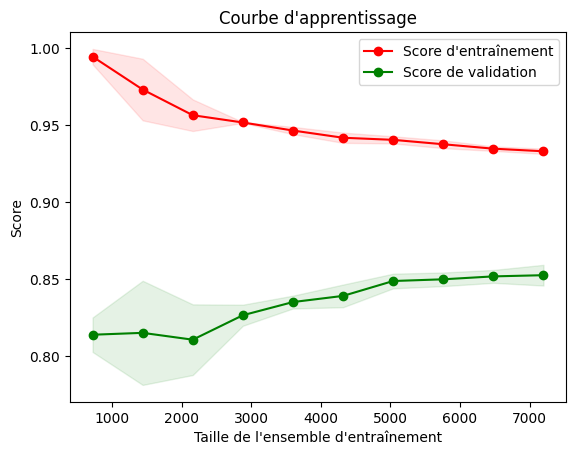

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Complement Naive Bayes(30% test + 70%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.8503333333333334
Précision: 0.8515625182864835
Rappel: 0.8503333333333334
Score F1: 0.850264052443324


#Matrice de confusion

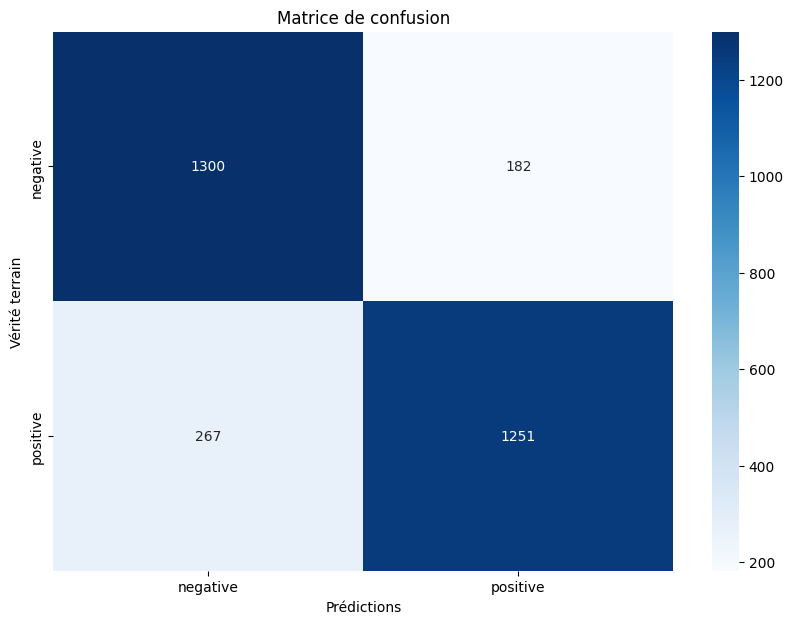

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

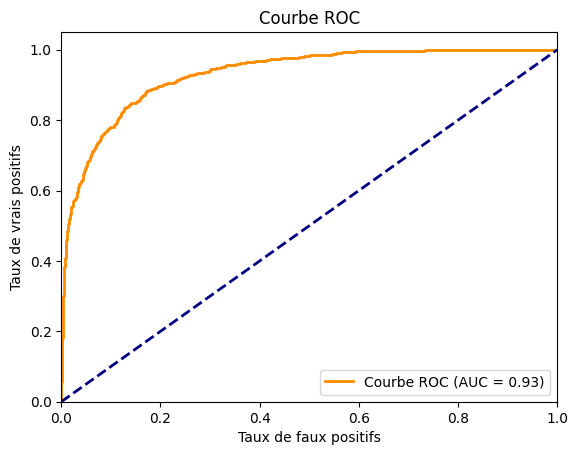

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

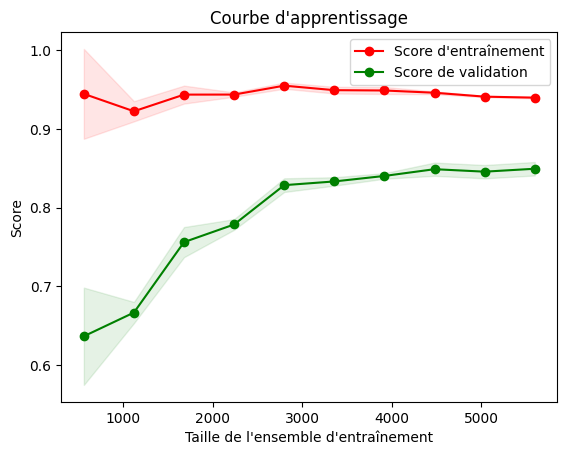

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle Complement Naive Bayes(40% test + 60%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB

# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entraîner le modèle Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("accuracy:", accuracy)
print("Précision:", precision)
print("Rappel:", recall)
print("Score F1:", f1)


accuracy: 0.84625
Précision: 0.8465601243693465
Rappel: 0.84625
Score F1: 0.8461948809255591


#Matrice de confusion

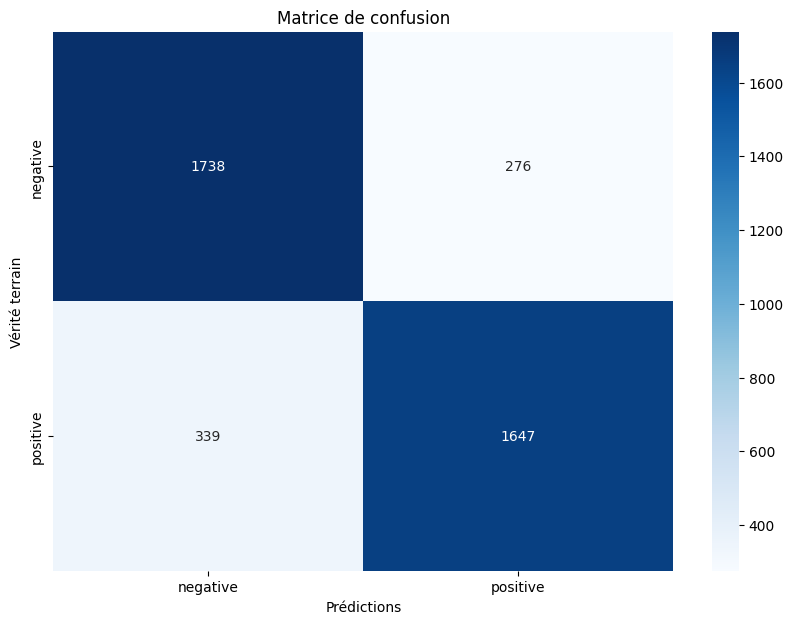

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

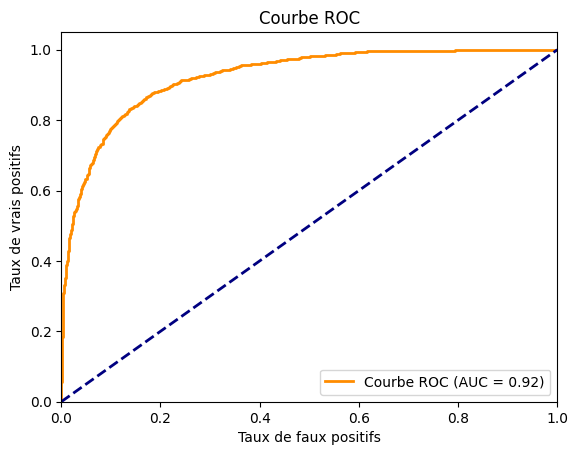

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

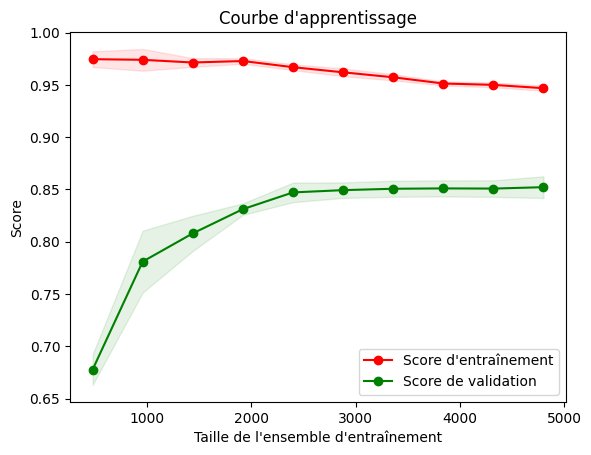

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle AdaBoost(20% test + 80%entrai)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle AdaBoost avec un classificateur de base DecisionTree
estimator  = DecisionTreeClassifier(max_depth=1)  # Arbre de décision de profondeur 1
model = AdaBoostClassifier(estimator =estimator , n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8145
Precision: 0.8155551845273892
Recall: 0.8145
F1-score: 0.8143164736625677


#Matrice de confusion

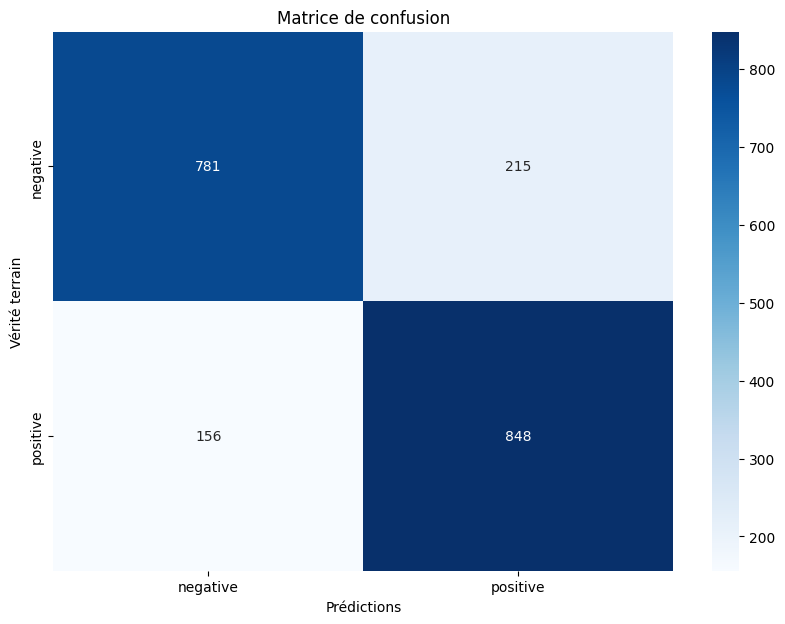

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

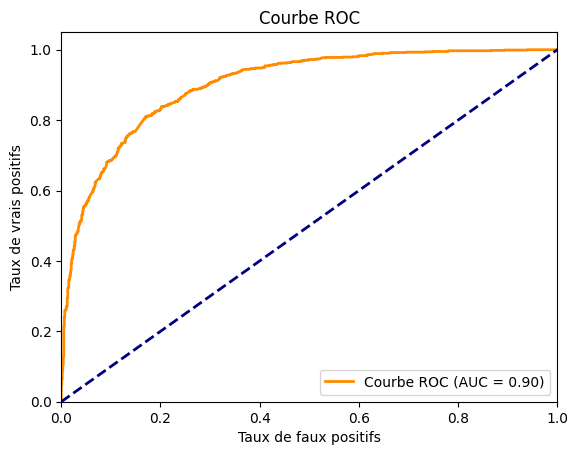

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

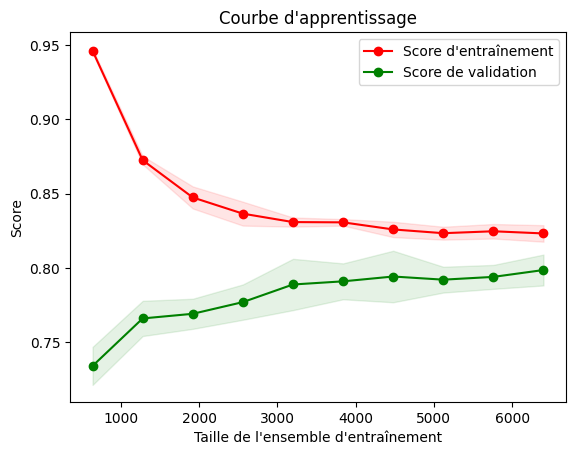

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle AdaBoost(10% test + 90%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Entraîner le modèle AdaBoost avec un classificateur de base DecisionTree
estimator = DecisionTreeClassifier(max_depth=1)  # Arbre de décision de profondeur 1
model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.794
Precision: 0.7944054140740265
Recall: 0.794
F1-score: 0.7938845494867975


#Matrice de confusion

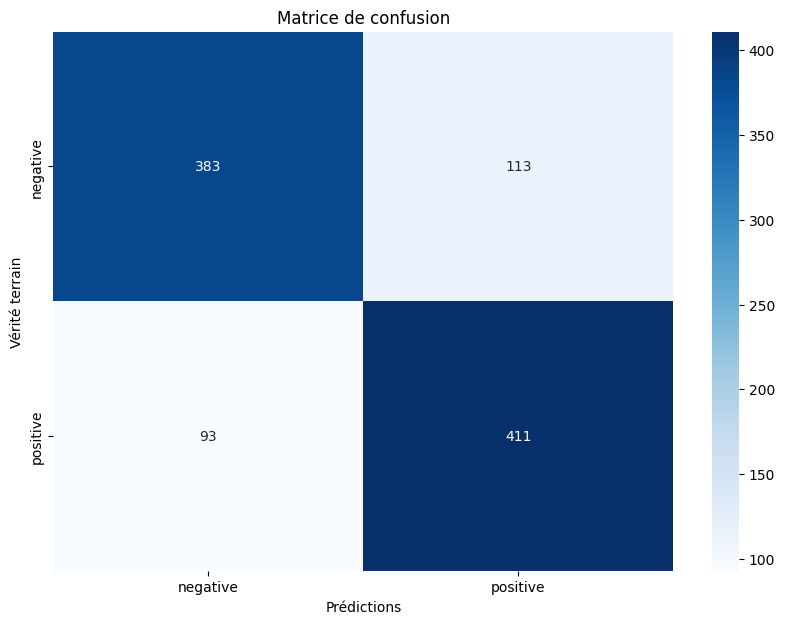

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

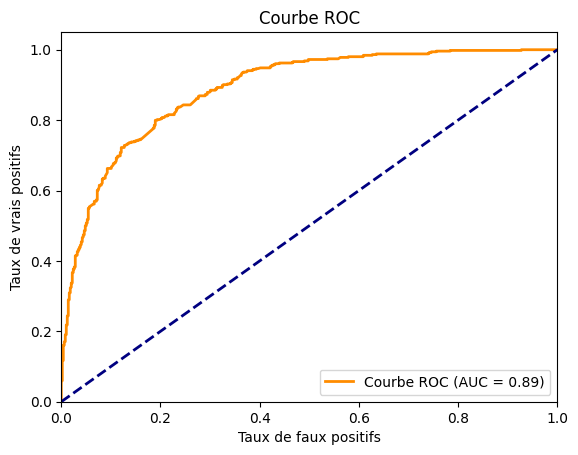

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

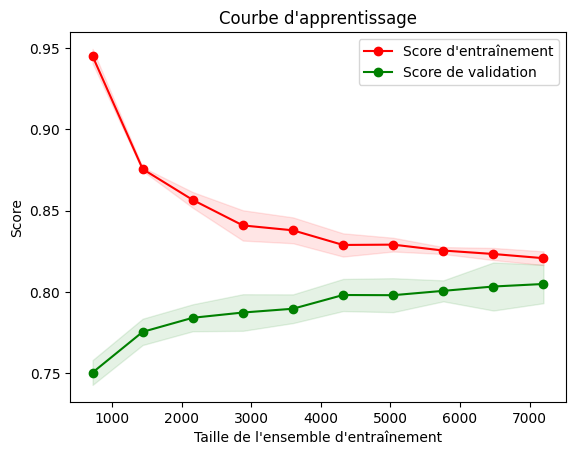

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle AdaBoost(30% test + 70%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle AdaBoost avec un classificateur de base DecisionTree
estimator = DecisionTreeClassifier(max_depth=1)  # Arbre de décision de profondeur 1
model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8056666666666666
Precision: 0.80767918437847
Recall: 0.8056666666666666
F1-score: 0.8052183549413819


#Matrice de confusion

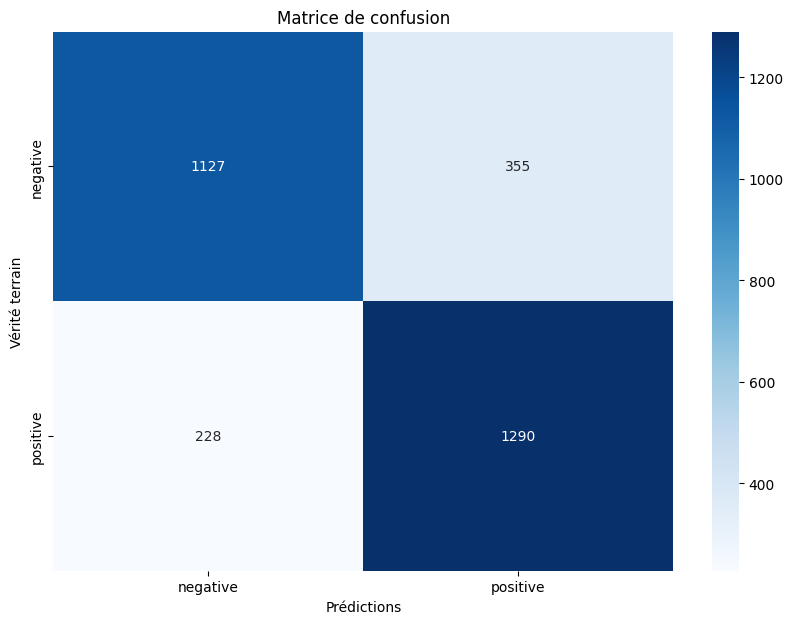

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

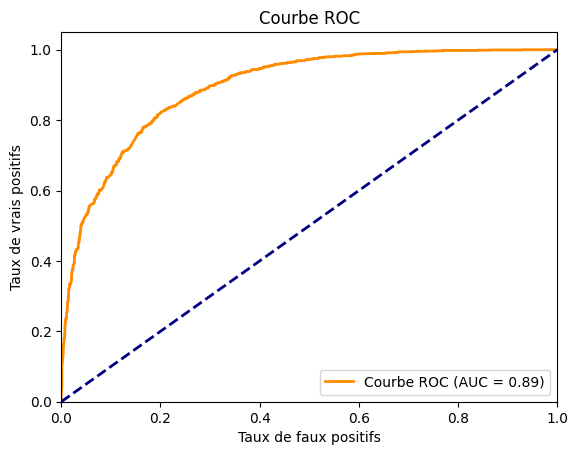

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

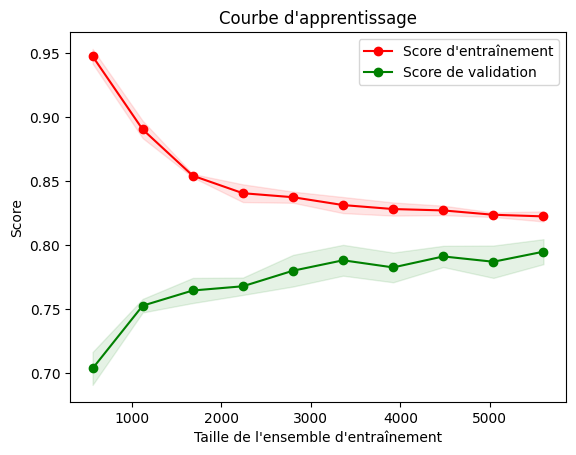

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle AdaBoost(40% test + 60%entrai)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Les étiquettes
y = data['sentiment']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entraîner le modèle AdaBoost avec un classificateur de base DecisionTree
estimator = DecisionTreeClassifier(max_depth=1)  # Arbre de décision de profondeur 1
model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Prédictions du modèle sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Affichage des résultats
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.80125
Precision: 0.8028518299161795
Recall: 0.80125
F1-score: 0.801051924188748


#Matrice de confusion

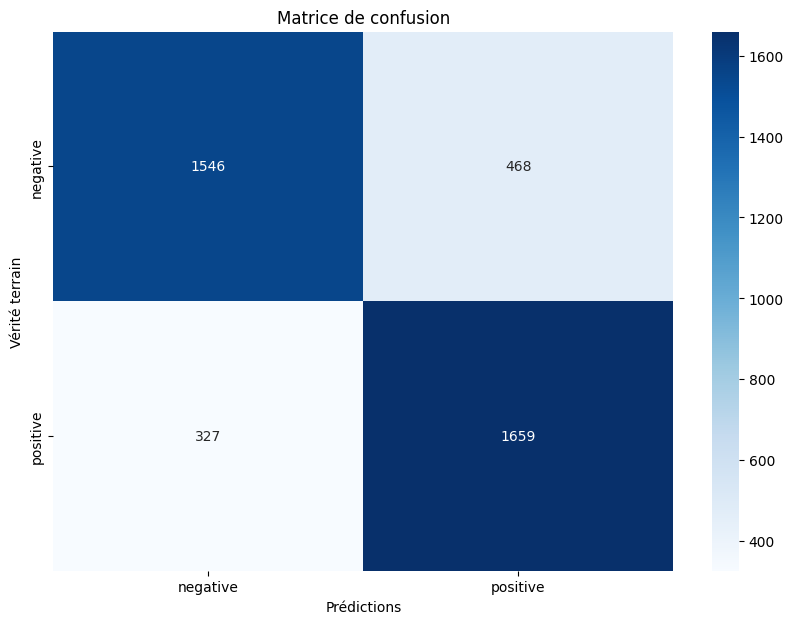

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

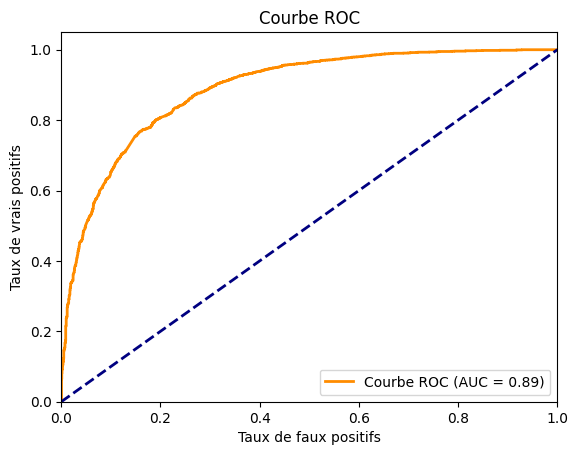

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Calculer les probabilités pour la courbe ROC
y_score = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC et l'AUC
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_auc = roc_auc_score(y_test, y_score)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

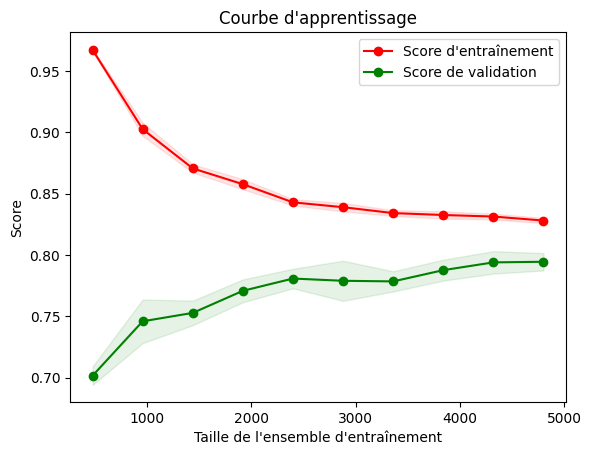

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
import matplotlib.pyplot as plt

# Tracer la courbe d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculer les moyennes et les écarts-types des scores d'apprentissage
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend(loc="best")
plt.show()

#Modéle RNN(20% test + 80%entrai)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Données textuelles
textes = data['Cleanedreview']
etiquettes = data['sentiment']

# Encoder les étiquettes
label_encoder = LabelEncoder()
etiquettes = label_encoder.fit_transform(etiquettes)
etiquettes = to_categorical(etiquettes)

# Tokenization
max_mots = 10000  # Nous utilisons maintenant 10 000 mots
max_longueur = 100
tokenizer = Tokenizer(num_words=max_mots)
tokenizer.fit_on_texts(textes)
sequences = tokenizer.texts_to_sequences(textes)
sequences_padded = pad_sequences(sequences, maxlen=max_longueur)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, etiquettes, test_size=0.2, random_state=42)

# Créer le modèle LSTM
model = Sequential()
model.add(Embedding(max_mots, 100, input_length=max_longueur))  # Nous utilisons la même dimension d'incorporation
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 64
epochs = 200

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Évaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Métriques
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')



Epoch 1/200
125/125 - 67s - loss: 0.4766 - accuracy: 0.7592 - val_loss: 0.3796 - val_accuracy: 0.8460 - 67s/epoch - 537ms/step
Epoch 2/200
125/125 - 37s - loss: 0.2313 - accuracy: 0.9118 - val_loss: 0.3834 - val_accuracy: 0.8485 - 37s/epoch - 298ms/step
Epoch 3/200
125/125 - 38s - loss: 0.1301 - accuracy: 0.9544 - val_loss: 0.5052 - val_accuracy: 0.8420 - 38s/epoch - 303ms/step
Epoch 4/200
125/125 - 39s - loss: 0.0738 - accuracy: 0.9766 - val_loss: 0.5415 - val_accuracy: 0.8405 - 39s/epoch - 311ms/step
Epoch 5/200
125/125 - 36s - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.4697 - val_accuracy: 0.8310 - 36s/epoch - 285ms/step
Epoch 6/200
125/125 - 38s - loss: 0.0654 - accuracy: 0.9787 - val_loss: 0.6721 - val_accuracy: 0.8320 - 38s/epoch - 303ms/step
Epoch 7/200
125/125 - 40s - loss: 0.0348 - accuracy: 0.9899 - val_loss: 0.6313 - val_accuracy: 0.8465 - 40s/epoch - 316ms/step
Epoch 8/200
125/125 - 38s - loss: 0.0260 - accuracy: 0.9921 - val_loss: 0.6668 - val_accuracy: 0.8435 - 38s/epo

Précision : 0.8264150990906183
Rappel : 0.8263333333333334
F1 Score : 0.8262969427314489
Rapport de classification :
              precision    recall  f1-score   support

    negative       0.83      0.81      0.82      1482
    positive       0.82      0.84      0.83      1518

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



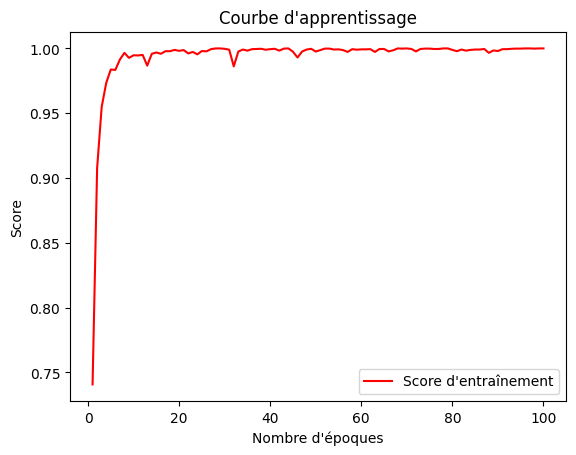

In [ ]:
rapport = classification_report(y_test_classes, y_pred_classes, target_names=[str(c) for c in label_encoder.classes_])

print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"F1 Score : {f1}")
print("Rapport de classification :")
print(rapport)
# Tracer la courbe d'apprentissage
train_sizes = range(1, epochs + 1)
train_accuracy = history.history['accuracy']

plt.plot(train_sizes, train_accuracy, 'r', label="Score d'entraînement")
plt.xlabel('Nombre d\'époques')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()

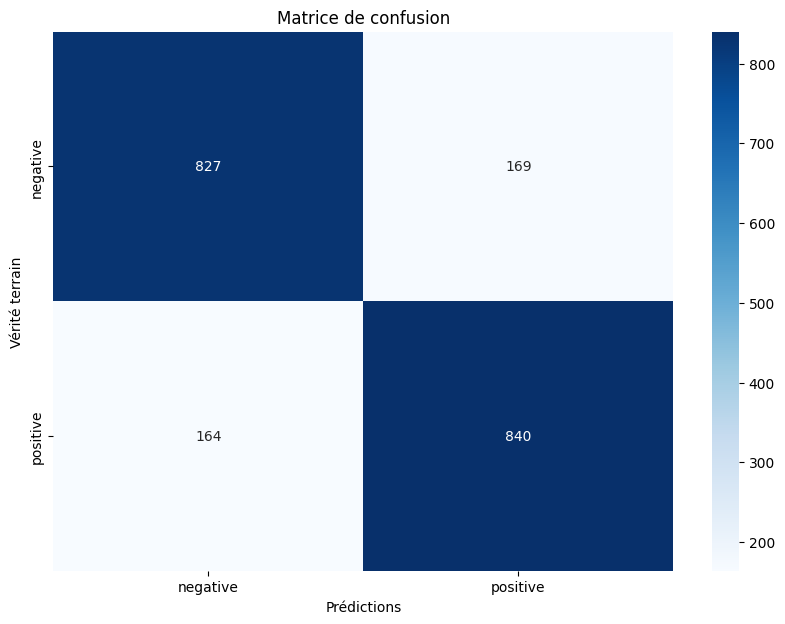

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

63/63 [==============================] - 6s 88ms/step


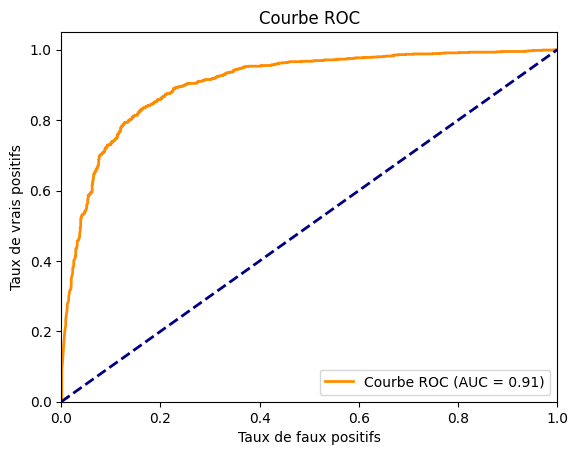

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Prédictions de probabilité du modèle
y_pred_proba = model.predict(X_test)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_classes, y_pred_proba[:, 1])

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

#Modéle RNN(10% test + 90%entrai)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Données textuelles
textes = data['Cleanedreview']
etiquettes = data['sentiment']

# Encoder les étiquettes
label_encoder = LabelEncoder()
etiquettes = label_encoder.fit_transform(etiquettes)
etiquettes = to_categorical(etiquettes)

# Tokenization
max_mots = 10000  # Nous utilisons maintenant 10 000 mots
max_longueur = 100
tokenizer = Tokenizer(num_words=max_mots)
tokenizer.fit_on_texts(textes)
sequences = tokenizer.texts_to_sequences(textes)
sequences_padded = pad_sequences(sequences, maxlen=max_longueur)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, etiquettes, test_size=0.1, random_state=42)

# Créer le modèle LSTM
model = Sequential()
model.add(Embedding(max_mots, 100, input_length=max_longueur))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])  # Pass metrics as a list of function names

# Entraîner le modèle
batch_size = 64
epochs = 100

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)

# Évaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Métriques
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')



Epoch 1/100
141/141 - 77s - loss: 0.5188 - accuracy: 0.7337 - val_loss: 0.3659 - val_accuracy: 0.8390 - 77s/epoch - 545ms/step
Epoch 2/100
141/141 - 49s - loss: 0.2446 - accuracy: 0.9048 - val_loss: 0.3697 - val_accuracy: 0.8450 - 49s/epoch - 346ms/step
Epoch 3/100
141/141 - 77s - loss: 0.1446 - accuracy: 0.9504 - val_loss: 0.3870 - val_accuracy: 0.8460 - 77s/epoch - 546ms/step
Epoch 4/100
141/141 - 48s - loss: 0.0907 - accuracy: 0.9693 - val_loss: 0.5176 - val_accuracy: 0.8450 - 48s/epoch - 337ms/step
Epoch 5/100
141/141 - 46s - loss: 0.0606 - accuracy: 0.9783 - val_loss: 0.6832 - val_accuracy: 0.8260 - 46s/epoch - 329ms/step
Epoch 6/100
141/141 - 46s - loss: 0.0522 - accuracy: 0.9828 - val_loss: 0.6971 - val_accuracy: 0.8300 - 46s/epoch - 328ms/step
Epoch 7/100
141/141 - 47s - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.6520 - val_accuracy: 0.8350 - 47s/epoch - 334ms/step
Epoch 8/100
141/141 - 46s - loss: 0.0323 - accuracy: 0.9889 - val_loss: 0.8730 - val_accuracy: 0.8300 - 46s/epo

Précision : 0.8264150990906183
Rappel : 0.8263333333333334
F1 Score : 0.8262969427314489
Rapport de classification :
              precision    recall  f1-score   support

    negative       0.83      0.81      0.82      1482
    positive       0.82      0.84      0.83      1518

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



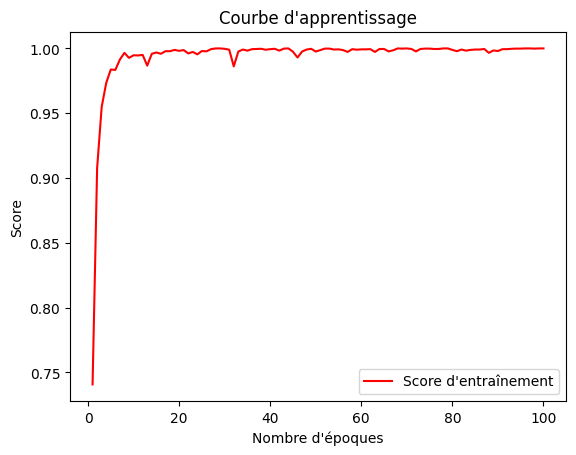

In [ ]:
rapport = classification_report(y_test_classes, y_pred_classes, target_names=[str(c) for c in label_encoder.classes_])

print(f"Précision : {precision}")
print(f"Rappel : {recall}")
print(f"F1 Score : {f1}")
print("Rapport de classification :")
print(rapport)
# Tracer la courbe d'apprentissage
train_sizes = range(1, epochs + 1)
train_accuracy = history.history['accuracy']

plt.plot(train_sizes, train_accuracy, 'r', label="Score d'entraînement")
plt.xlabel('Nombre d\'époques')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()

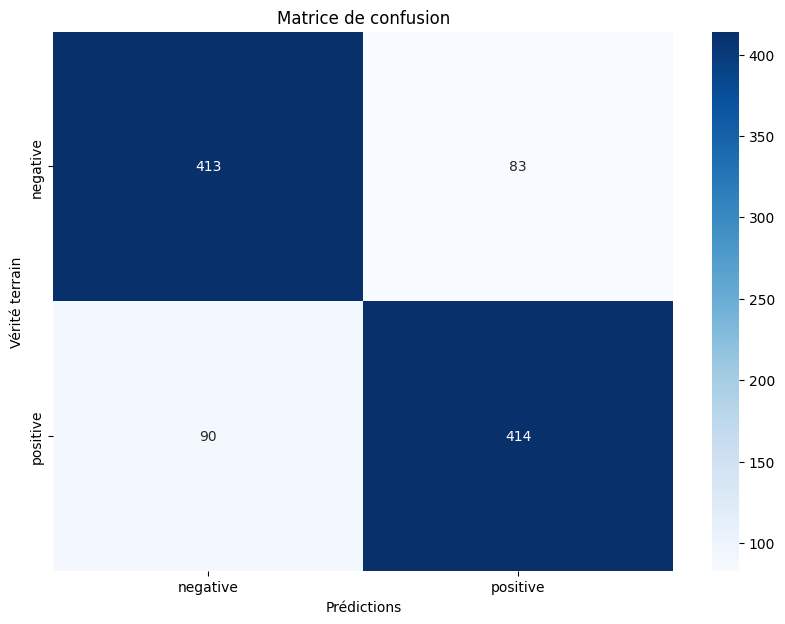

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

32/32 [==============================] - 1s 37ms/step


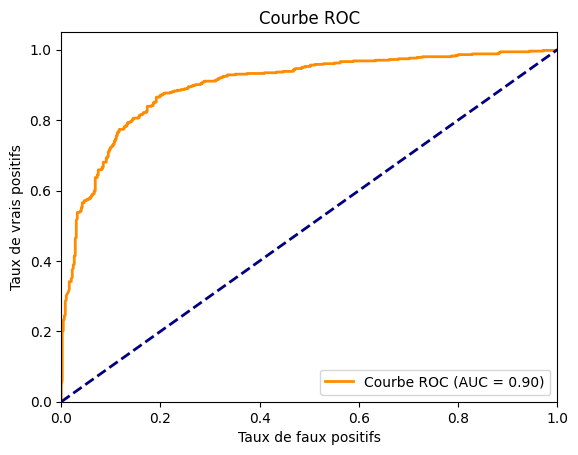

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Prédictions de probabilité du modèle
y_pred_proba = model.predict(X_test)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_classes, y_pred_proba[:, 1])

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

#Modéle RNN(30% test + 70%entrai)

Epoch 1/100
110/110 - 56s - loss: 0.5121 - accuracy: 0.7380 - 56s/epoch - 505ms/step
Epoch 2/100
110/110 - 40s - loss: 0.2424 - accuracy: 0.9067 - 40s/epoch - 363ms/step
Epoch 3/100
110/110 - 38s - loss: 0.1365 - accuracy: 0.9546 - 38s/epoch - 349ms/step
Epoch 4/100
110/110 - 39s - loss: 0.0774 - accuracy: 0.9744 - 39s/epoch - 352ms/step
Epoch 5/100
Epoch 6/100
110/110 - 40s - loss: 0.0483 - accuracy: 0.9834 - 40s/epoch - 365ms/step
Epoch 7/100
110/110 - 38s - loss: 0.0339 - accuracy: 0.9896 - 38s/epoch - 341ms/step
Epoch 8/100
110/110 - 39s - loss: 0.0267 - accuracy: 0.9913 - 39s/epoch - 353ms/step
Epoch 9/100
110/110 - 41s - loss: 0.0166 - accuracy: 0.9934 - 41s/epoch - 376ms/step
Epoch 10/100
110/110 - 40s - loss: 0.0162 - accuracy: 0.9941 - 40s/epoch - 361ms/step
Epoch 11/100
110/110 - 37s - loss: 0.0166 - accuracy: 0.9954 - 37s/epoch - 337ms/step
Epoch 12/100
110/110 - 39s - loss: 0.0089 - accuracy: 0.9977 - 39s/epoch - 357ms/step
Epoch 13/100
110/110 - 38s - loss: 0.0115 - accura

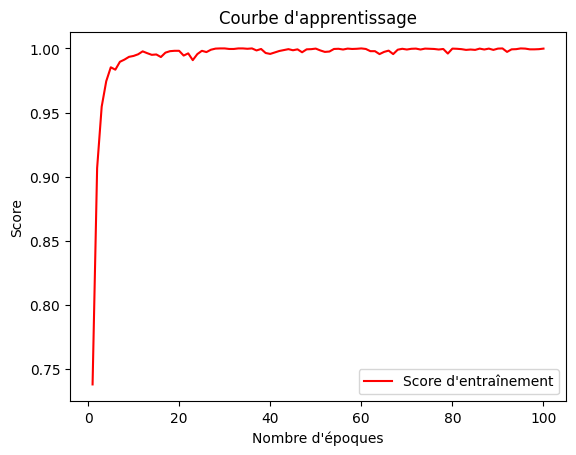

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Données textuelles
textes = data['Cleanedreview']
etiquettes = data['sentiment']

# Encoder les étiquettes
label_encoder = LabelEncoder()
etiquettes = label_encoder.fit_transform(etiquettes)
etiquettes = to_categorical(etiquettes)

# Tokenization
max_mots = 10000  # Nous utilisons maintenant 10 000 mots
max_longueur = 100
tokenizer = Tokenizer(num_words=max_mots)
tokenizer.fit_on_texts(textes)
sequences = tokenizer.texts_to_sequences(textes)
sequences_padded = pad_sequences(sequences, maxlen=max_longueur)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, etiquettes, test_size=0.3, random_state=42)

# Créer le modèle LSTM
model = Sequential()
model.add(Embedding(max_mots, 100, input_length=max_longueur))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 64
epochs = 100

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

# Évaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Métriques
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Tracer la courbe d'apprentissage
train_sizes = range(1, epochs + 1)
train_accuracy = history.history['accuracy']

plt.plot(train_sizes, train_accuracy, 'r', label="Score d'entraînement")
plt.xlabel('Nombre d\'époques')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()


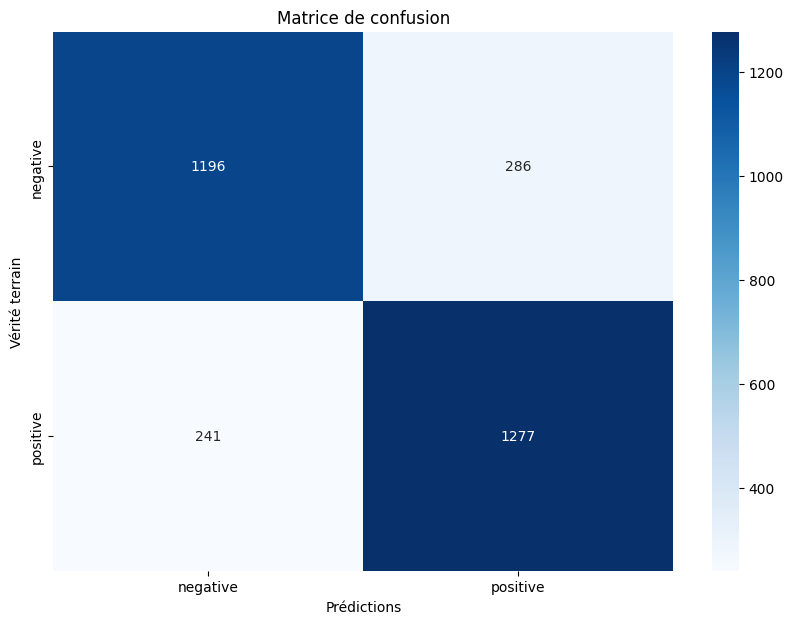

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

94/94 [==============================] - 5s 57ms/step


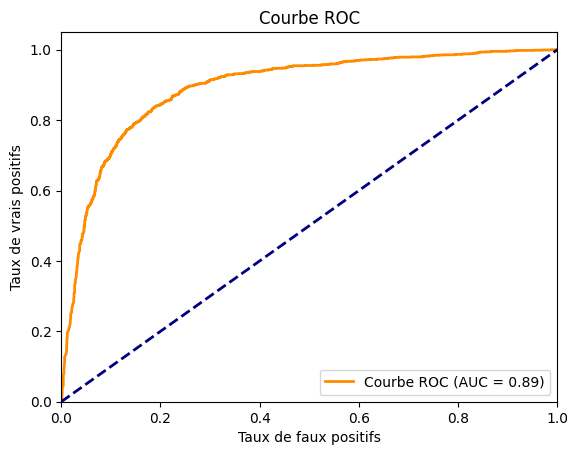

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Prédictions de probabilité du modèle
y_pred_proba = model.predict(X_test)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_classes, y_pred_proba[:, 1])

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

#Modéle RNN(40% test + 60%entrai)

Epoch 1/100
110/110 - 40s - loss: 0.5093 - accuracy: 0.7407 - 40s/epoch - 363ms/step
Epoch 2/100
110/110 - 40s - loss: 0.2409 - accuracy: 0.9077 - 40s/epoch - 361ms/step
Epoch 3/100
110/110 - 35s - loss: 0.1295 - accuracy: 0.9549 - 35s/epoch - 319ms/step
Epoch 4/100
110/110 - 34s - loss: 0.0800 - accuracy: 0.9734 - 34s/epoch - 309ms/step
Epoch 5/100
110/110 - 34s - loss: 0.0518 - accuracy: 0.9837 - 34s/epoch - 310ms/step
Epoch 6/100
110/110 - 35s - loss: 0.0487 - accuracy: 0.9834 - 35s/epoch - 314ms/step
Epoch 7/100
110/110 - 36s - loss: 0.0262 - accuracy: 0.9914 - 36s/epoch - 326ms/step
Epoch 8/100
110/110 - 36s - loss: 0.0125 - accuracy: 0.9966 - 36s/epoch - 326ms/step
Epoch 9/100
110/110 - 37s - loss: 0.0216 - accuracy: 0.9927 - 37s/epoch - 332ms/step
Epoch 10/100
110/110 - 34s - loss: 0.0174 - accuracy: 0.9947 - 34s/epoch - 314ms/step
Epoch 11/100
110/110 - 37s - loss: 0.0166 - accuracy: 0.9946 - 37s/epoch - 332ms/step
Epoch 12/100
110/110 - 34s - loss: 0.0160 - accuracy: 0.9950 - 

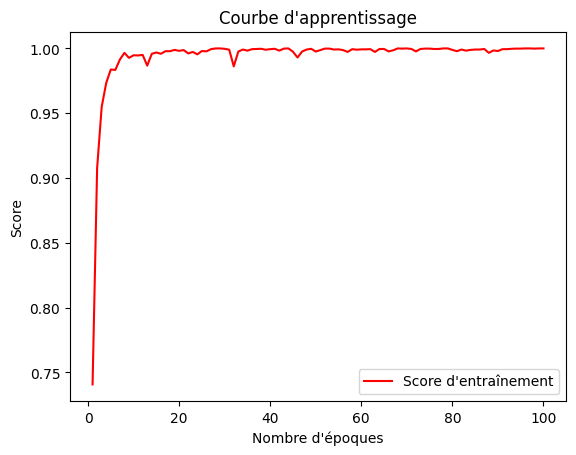

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Données textuelles
textes = data['Cleanedreview']
etiquettes = data['sentiment']

# Encoder les étiquettes
label_encoder = LabelEncoder()
etiquettes = label_encoder.fit_transform(etiquettes)
etiquettes = to_categorical(etiquettes)

# Tokenization
max_mots = 10000  # Nous utilisons maintenant 10 000 mots
max_longueur = 100
tokenizer = Tokenizer(num_words=max_mots)
tokenizer.fit_on_texts(textes)
sequences = tokenizer.texts_to_sequences(textes)
sequences_padded = pad_sequences(sequences, maxlen=max_longueur)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sequences_padded, etiquettes, test_size=0.3, random_state=42)

# Créer le modèle LSTM
model = Sequential()
model.add(Embedding(max_mots, 100, input_length=max_longueur))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 64
epochs = 100

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

# Évaluation
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Métriques
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Tracer la courbe d'apprentissage
train_sizes = range(1, epochs + 1)
train_accuracy = history.history['accuracy']

plt.plot(train_sizes, train_accuracy, 'r', label="Score d'entraînement")
plt.xlabel('Nombre d\'époques')
plt.ylabel('Score')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()


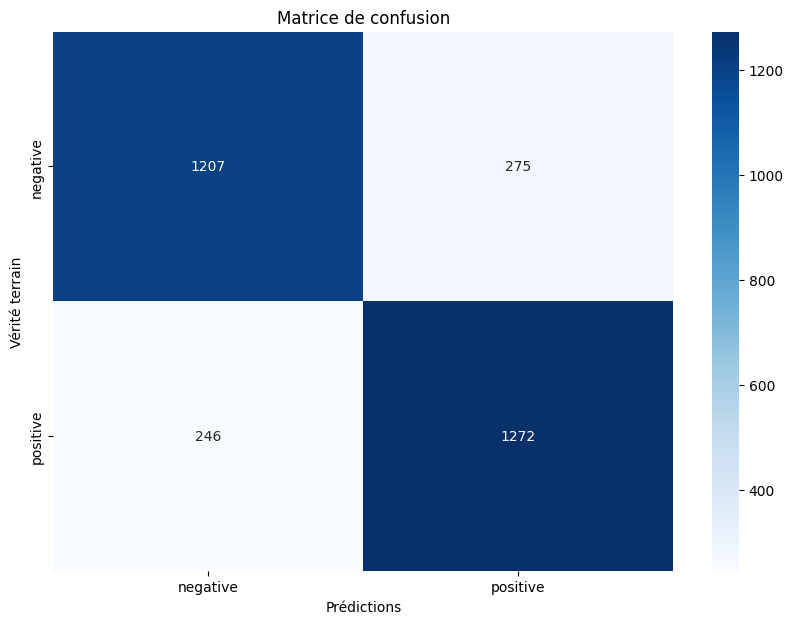

In [ ]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

94/94 [==============================] - 7s 76ms/step


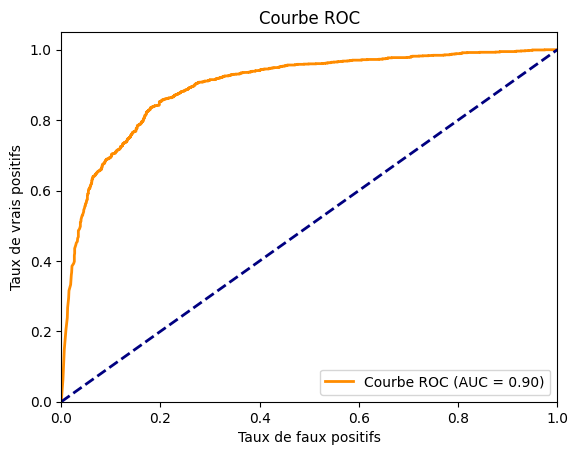

In [ ]:
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score


# Prédictions de probabilité du modèle
y_pred_proba = model.predict(X_test)

# Calculer la courbe ROC et l'AUC pour chaque classe
fpr, tpr, _ = roc_curve(y_test_classes, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test_classes, y_pred_proba[:, 1])

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale pour une performance aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()